## <font color=blue> ::Load Modules:: </font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from netCDF4 import Dataset
from pandas.plotting import table 
import xarray as xr
from datetime import date
import time
import os

---
### Load Data

In [2]:
scenario = 245
#
data_nc=xr.open_dataset(os.getcwd()+"/emulandiceAIS_GIS_ssp{arg1}_globalsl.nc".format(arg1=scenario))
data_nc

<xarray.Dataset>
Dimensions:                (years: 9, quantiles: 3)
Coordinates:
  * years                  (years) int32 2020 2030 2040 2050 ... 2080 2090 2100
  * quantiles              (quantiles) int64 50 17 83
Data variables:
    AIS_sea_level_change   (quantiles, years) int16 ...
    EAIS_sea_level_change  (quantiles, years) int16 ...
    WAIS_sea_level_change  (quantiles, years) int16 ...
    PEN_sea_level_change   (quantiles, years) int16 ...
    GIS_sea_level_change   (quantiles, years) int16 ...
Attributes:
    description:  Global SLR contribution from Antarctica using the emulandic...
    history:      Created Tue Jun 13 15:00:29 2023
    source:       ssp245.emuAIS.emulandice.AIS.  , ssp245.emuGrIS.emulandice....
    scenario:     ssp245
    baseyear:     2005
    units:        mm

---
### Plot Data

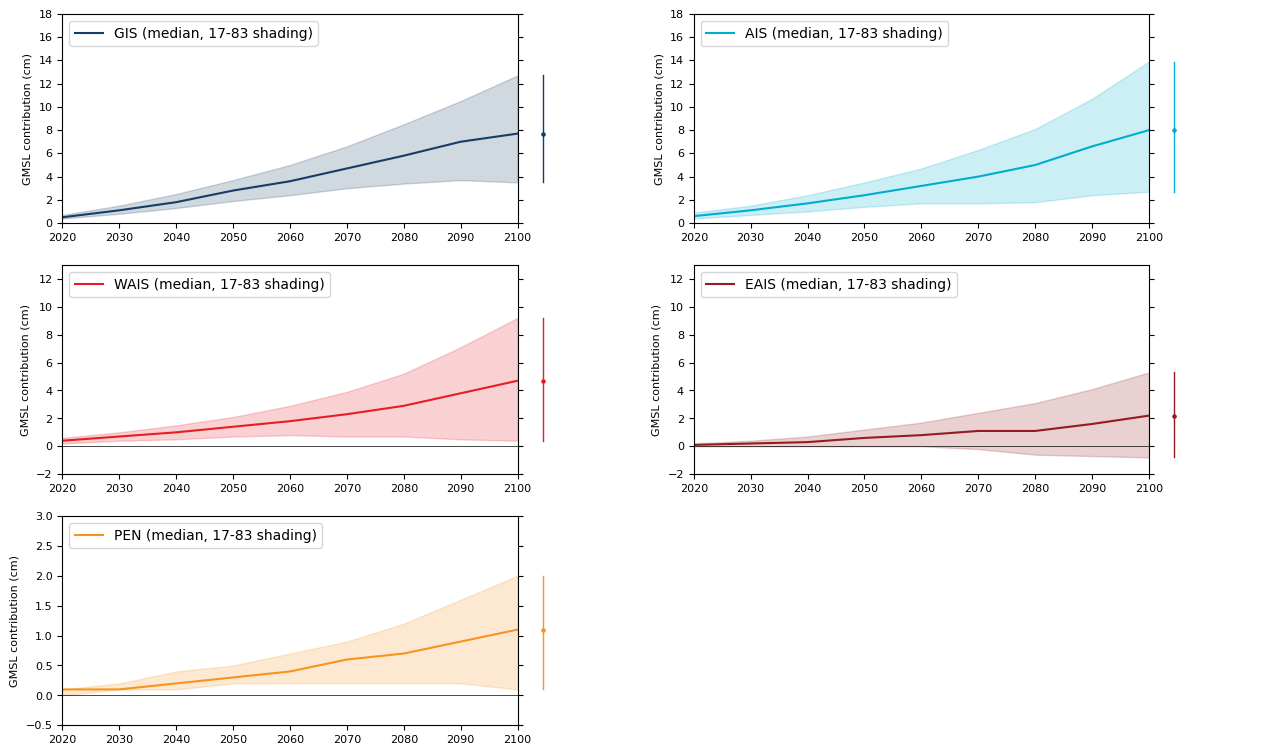

In [3]:
color_AIS      = np.array([0, 173,207])/255
color_GIS     = np.array([23  ,60 ,  102])/255
color_WAIS     = np.array([231 ,29 ,  37])/255
color_EAIS     = np.array([149 ,27 ,  30])/255
color_PEN      = np.array([247 ,148,  32])/255
#
COMPONENT = ['GIS','AIS','WAIS','EAIS','PEN']
#
convert=10 #convert to cm
#
plt.rcParams.update({'figure.figsize':(40,35), 'figure.dpi':100})
grid = plt.GridSpec(4, 5, wspace=0.1, hspace=-.4)
grid00 = grid[0].subgridspec(4, 5); grid01 = grid[1].subgridspec(4, 5)
#
# Common xaxis.
XAX1          = data_nc.years.values
xlim, xlim1   = [2020,2100], [.1,2]
#
# Subplot Axis (Left plots)
ax1_GIS,  ax2_GIS     = plt.subplot(grid00[0, :4]),    plt.subplot(grid00[0, 4]);
ax1_WAIS, ax2_WAIS    = plt.subplot(grid00[1, :4]),    plt.subplot(grid00[1, 4]);
ax1_PEN,  ax2_PEN     = plt.subplot(grid00[2, :4]),    plt.subplot(grid00[2, 4]);
# (Right plots)
ax1_AIS,  ax2_AIS     = plt.subplot(grid01[0, :4]),    plt.subplot(grid01[0, 4]);
ax1_EAIS, ax2_EAIS    = plt.subplot(grid01[1, :4]),    plt.subplot(grid01[1, 4]);
# ax1_,   ax2_        = plt.subplot(grid01[2, :4]),    plt.subplot(grid01[2, 4]);
#
#
for component in COMPONENT: 
    ax1 = eval(f'ax1_{component}');    ax2 = eval(f'ax2_{component}')
    #
    # =======================
    # Plot Left (line plot)
    idxp50 = np.where(data_nc.quantiles.values == 50)[0]; 
    Yax50=np.squeeze(eval(f'data_nc.{component}_sea_level_change.values[idxp50,:]/convert'))
    #
    idxp17 = np.where(data_nc.quantiles.values == 17)[0]
    Yax17=np.squeeze(eval(f'data_nc.{component}_sea_level_change.values[idxp17,:]/convert'))
    #
    idxp83 = np.where(data_nc.quantiles.values == 83)[0]
    Yax83=np.squeeze(eval(f'data_nc.{component}_sea_level_change.values[idxp83,:]/convert'))
    #
    ax1.plot(XAX1, Yax50, label = f'{component} (median, 17-83 shading)', color = eval(f'color_{component}'))
    ax1.fill_between(XAX1, Yax17, Yax83, color = eval(f'color_{component}'), alpha=0.2)
    ax1.axhline(y=0, color='black', linewidth=0.5)
    # =======================
    #
    # Plot Right (whisker plot)
    XAX2    = np.array([[.2,.2]]) 
    idxt    = np.where(data_nc.years.values == 2100)[0]
    dumYax1 = eval(f'(data_nc.{component}_sea_level_change.values[idxp17,idxt])/convert')
    dumYax2 = eval(f'(data_nc.{component}_sea_level_change.values[idxp83,idxt])/convert')
    dumYax3 = eval(f'(data_nc.{component}_sea_level_change.values[idxp50,idxt])/convert')
    Yax2_1  = np.concatenate((dumYax1, dumYax2))
    Yax2_3=np.concatenate((dumYax3, dumYax3))
    #
    ax2.plot(XAX2.transpose(), Yax2_1.transpose(),color = eval(f'color_{component}'),linewidth=1)
    ax2.plot(XAX2.transpose(), Yax2_3.transpose(), color = eval(f'color_{component}'),marker = 'o',ms = 2,mfc='none')
    #
    # =======================
    # Use Common Yaxis limits across panels.
    if component == 'GIS':  ylim =[0, 18]
    if component == 'AIS':  ylim =[0, 18]
    if component == 'WAIS':  ylim =[-2, 13]
    if component == 'EAIS':  ylim =[-2, 13]
    if component == 'PEN':  ylim =[-.5, 3]
    # =======================
    # Ax properties.
    ax1.legend(loc='upper left',prop={'size': 10}); 
    ax1.tick_params(axis='both', labelsize=8)
    ax1.yaxis.set_ticks_position('both')
    ax1.set_xlim(xlim); ax1.set_ylim(ylim)
    ax2.set_ylim(ylim); ax2.axis('off'); ax2.set_xlim(xlim1);
    ax1.set_ylabel("GMSL contribution (cm)", size=8);
plt.show()